In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Clean_Data.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59445 entries, 0 to 59444
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       59445 non-null  int64  
 1   timestamp        59445 non-null  object 
 2   TP2              59445 non-null  float64
 3   TP3              59445 non-null  float64
 4   H1               59445 non-null  float64
 5   DV_pressure      59445 non-null  float64
 6   Reservoirs       59445 non-null  float64
 7   Oil_temperature  59445 non-null  float64
 8   Motor_current    59445 non-null  float64
 9   COMP             59445 non-null  float64
 10  DV_eletric       59445 non-null  float64
 11  Towers           59445 non-null  float64
 12  MPG              59445 non-null  float64
 13  LPS              59445 non-null  float64
 14  Pressure_switch  59445 non-null  float64
 15  Oil_level        59445 non-null  float64
 16  Caudal_impulses  59445 non-null  float64
 17  status      

In [4]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
gaussian_classifier = GaussianNB()

# Train the models
gaussian_classifier.fit(X_train, y_train)

# Predictions
y_pred_gaussian = gaussian_classifier.predict(X_test)

Accuracy Score: 94.802
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      6026
           1       0.91      0.99      0.95      5863

    accuracy                           0.95     11889
   macro avg       0.95      0.95      0.95     11889
weighted avg       0.95      0.95      0.95     11889



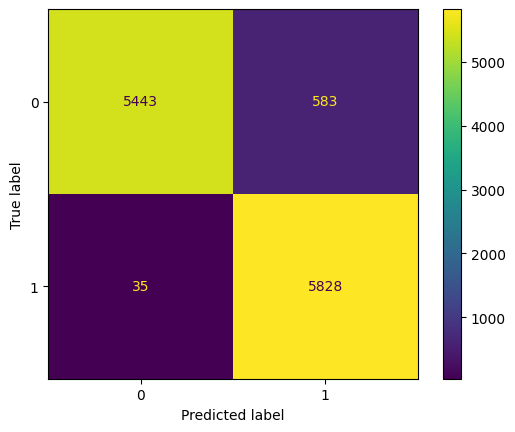

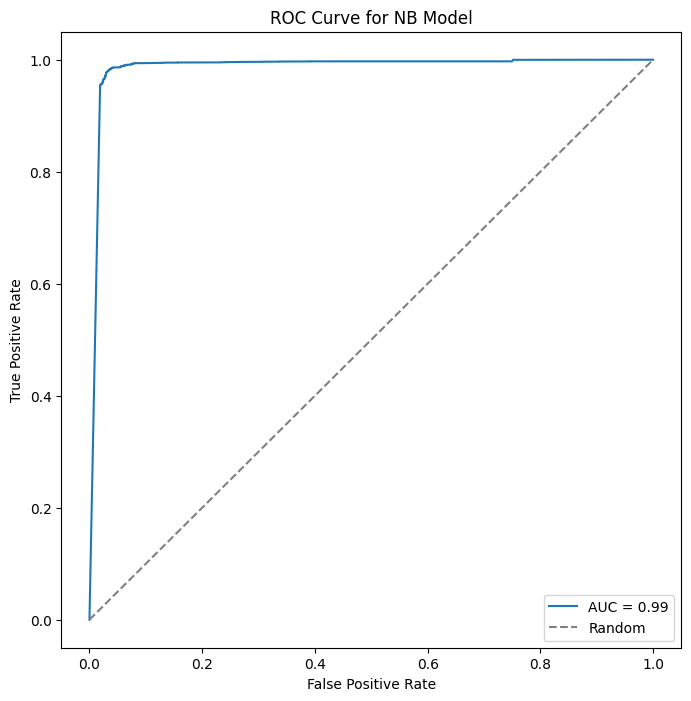

AUC Score for NB Model: 0.9867


In [11]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {:,.3f}".format(accuracy_score(y_test, y_pred_gaussian) * 100))
print(classification_report(y_test, y_pred_gaussian))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gaussian)
plt.show()

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Assuming X_test is your test set features and y_test is the corresponding true labels
y_prob_NB = gaussian_classifier.predict_proba(X_test)[:, 1]  

# ROC Curve and AUC Score
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, y_prob_NB)
auc_score_NB = roc_auc_score(y_test, y_prob_NB)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_NB, tpr_NB, label=f'AUC = {auc_score_NB:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for NB Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'AUC Score for NB Model: {auc_score_NB:.4f}')